In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
df1=pd.read_csv('/Users/rissu/Dataset_csvs/questions.csv',parse_dates=True)
df2=pd.read_csv('/Users/rissu/Dataset_csvs/question_tags.csv')

In [3]:
df1.head()

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount
0,1,2008-07-31T21:26:37Z,NaN,2011-03-28T00:53:47Z,1,NaN,0.0
1,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0
2,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0
3,8,2008-07-31T23:33:19Z,2013-06-03T04:00:25Z,2015-02-11T08:26:40Z,42,NaN,8.0
4,9,2008-07-31T23:40:59Z,NaN,NaN,1410,1.0,58.0


In [4]:
df2.head()

,Id,Tag
0,1,data
1,4,c#
2,4,winforms
3,4,type-conversion
4,4,decimal


In [5]:
df1.shape

(17203824, 7)

In [6]:
df2.shape

(50576842, 2)

In [7]:
df1['Id'].nunique(),df2['Id'].nunique()

(17203824, 17203824)

In [8]:
df3=df1.copy()

In [9]:
df3=df3.merge(df2,left_on='Id',right_on='Id')

In [10]:
df3.head(10)

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,Tag
0,1,2008-07-31T21:26:37Z,NaN,2011-03-28T00:53:47Z,1,NaN,0.0,data
1,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,c#
2,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,winforms
3,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,type-conversion
4,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,decimal
5,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,opacity
6,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0,html
7,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0,css
8,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0,css3
9,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0,internet-explorer-7


In [11]:
df3.isnull().sum()

Id                     0
CreationDate           0
ClosedDate      45869597
DeletionDate    39293268
Score                  0
OwnerUserId     11713623
AnswerCount      5241311
Tag                13909
dtype: int64

In [12]:
df3.isnull().sum()/len(df3)

Id              0.000000
CreationDate    0.000000
ClosedDate      0.906929
DeletionDate    0.776902
Score           0.000000
OwnerUserId     0.231601
AnswerCount     0.103631
Tag             0.000275
dtype: float64

In [13]:
def createDate(date):
    return pd.to_datetime(date).year


df3['Created_year']=pd.DatetimeIndex(df3['CreationDate']).year

In [14]:
df3['Created_month']=pd.DatetimeIndex(df3['CreationDate']).month

In [15]:
df3.head(10)

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,Tag,Created_year,Created_month
0,1,2008-07-31T21:26:37Z,NaN,2011-03-28T00:53:47Z,1,NaN,0.0,data,2008,7
1,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,c#,2008,7
2,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,winforms,2008,7
3,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,type-conversion,2008,7
4,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,decimal,2008,7
5,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,opacity,2008,7
6,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0,html,2008,7
7,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0,css,2008,7
8,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0,css3,2008,7
9,6,2008-07-31T22:08:08Z,NaN,NaN,207,9.0,5.0,internet-explorer-7,2008,7


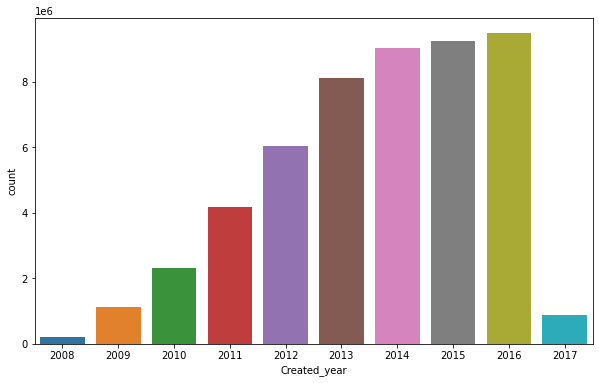

In [16]:
pl.figure(figsize=(10,6))
sns.countplot(df3['Created_year'])
pl.show()

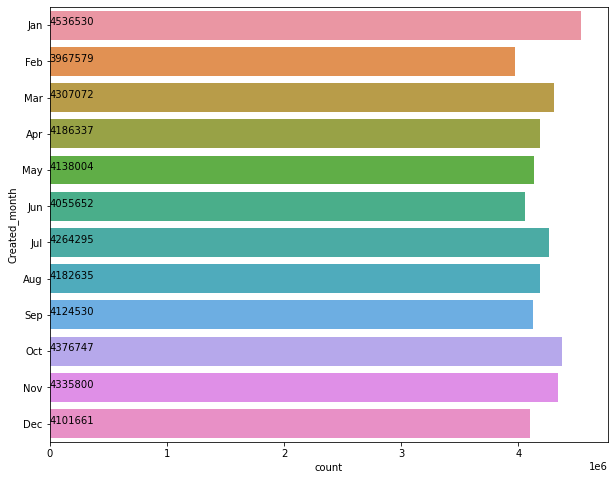

In [18]:
pl.figure(figsize=(10,8))
ax=sns.countplot(y=df3['Created_month'])
pl.yticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i,j in enumerate(df3['Created_month'].value_counts().reset_index().sort_values('index')['Created_month']):
    ax.text(10,i,j)
pl.show()

In [19]:
df3['Created_month'].value_counts().reset_index().sort_values('index')['Created_month']

0     4536530
11    3967579
3     4307072
5     4186337
7     4138004
10    4055652
4     4264295
6     4182635
8     4124530
1     4376747
2     4335800
9     4101661
Name: Created_month, dtype: int64

In [20]:
top20tags=df3['Tag'].value_counts().reset_index().head(20)

In [22]:
top20tags.columns=['Tag','Counts']
top20tags

,Tag,Counts
0,javascript,1649631
1,java,1563820
2,php,1365600
3,c#,1321027
4,android,1288338
5,jquery,1011324
6,python,854172
7,html,776512
8,ios,635227
9,c++,627341


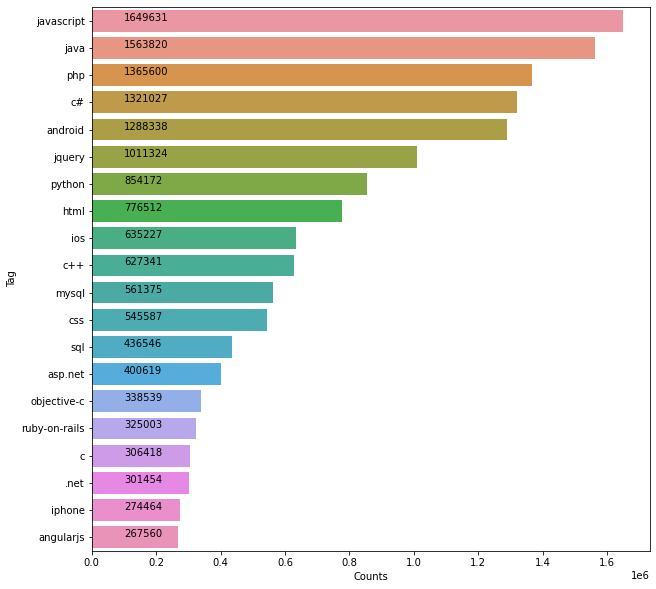

In [30]:
pl.figure(figsize=(10,10))
ax=sns.barplot(x='Counts',y='Tag',data=top20tags)
for i,j in enumerate(top20tags['Counts']):
    ax.text(100000,i,j)